# Задание 1. 
Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. 
>Результат моделирования (массив размера 20000) запишите в переменную states.

In [2]:
import random as rdm
from scipy import *   


import numpy as np
import matplotlib.pyplot as plt

def rng(m=2**32, a=1103515245, c=1234567):
    
    rng.current = (a * rng.current + c) % m
    return rng.current / m

def change(current_w, i, random_value, t): # сделал свой аналог switch case
    if (current_w == "sunny"):
        if (random_value>= 0 and random_value <= t[0][0]):
            return ("sunny")
        if (random_value>t[0][0] and random_value <= t[0][0]+t[0][1]):
            return("cloudy")
        if (random_value>t[0][0]+t[0][1] and random_value <= t[0][0]+t[0][1]+t[0][2]):
            return("rainy")
    
    if (current_w == "cloudy"):
        if (random_value>=0 and random_value <= t[1][0]):
            return ("sunny")
        if (random_value>t[1][0] and random_value <= t[1][0]+t[1][1]):
            return("cloudy")
        if (random_value>t[1][0]+t[1][1] and random_value <= t[1][0]+t[1][1]+t[1][2]):
            return("rainy")
        
    if (current_w == "rainy"):
        if (random_value>=0 and random_value <= t[2][0]):
            return ("sunny")
        if (random_value>t[2][0] and random_value <= t[2][0]+t[2][1]):
            return("cloudy")
        if (random_value>t[2][0]+t[2][1] and random_value <= t[2][0]+t[2][1]+t[2][2]):
            return("rainy")
        
    else: return ("Error")

rng.current = 1113
random = [rng() for i in range(20000)] # попробуем так

current_w = rdm.choice(["sunny", "cloudy", "rainy"])

state_wheather = ("sunny", "cloudy", "rainy")
t = np.array(((0.6, 0.3, 0.1),
              (0.3, 0.4, 0.3),
              (0.2, 0.3, 0.5)))

states=[]

for i in range (20000):
    states.append(change(current_w, i, random[i], t))

## Задание 2. 
На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды.

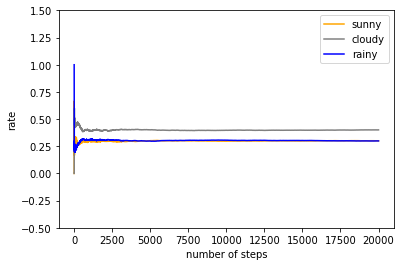

In [3]:
import pylab

s=np.empty(20000)
c=np.empty(20000)
r=np.empty(20000)

for i in range(20000):
    s[i] = states[:(i+1)].count('sunny') / (i+1)
    c[i] = states[:(i+1)].count('cloudy') / (i+1)
    r[i] = states[:(i+1)].count('rainy') / (i+1)
    
plt.plot(s, color = 'orange', label = 'sunny')
plt.plot(c, color = 'gray', label = 'cloudy')
plt.plot(r, color = 'blue', label = 'rainy')

plt.ylabel("rate")
plt.xlabel("number of steps")


pylab.ylim (-0.5, 1.5)

plt.legend()
plt.show()

## Задание 3.
>Как следует из картинки, частоты сходятся к некоторым стационарным значениям. 

Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [502]:
# Имеем матричное уравнение πP=π. Перепишем его так:
# P^t * π^t = π^t. Тогда (P^t - E)*π^t = 0 Напишем програмку для нахождения этой матрицы

# b = np.zeros(3)
# Matrix = t.copy()
# Matrix_transpose = Matrix.transpose()

# for i in range(len(t)):
#     Matrix_transpose[i][i] -= 1 

# p = np.linalg.solve(Matrix_transpose, b)

# Почему-то выдаёт ошибку LinAlgError: Singular matrix. Часы же не прошли зря, попробуем иначе

Matrix = t.copy()
x = np.array( (s[19999], c[19999], r[19999]) )
result = x.dot(Matrix) #Если в первой программе задавать другие значения для рандомайзера, то значения становятся точнее

print(result)
print(x)

[0.47066 0.32978 0.19956]
[0.6022 0.2978 0.1   ]


Да, схожи)

In [503]:
power1 = np.linalg.matrix_power(t, 10)
print(power1, "\n")

power2 = np.linalg.matrix_power(t, 25)
print(power2)

[[0.38894132 0.33333333 0.27772535]
 [0.38887141 0.33333333 0.27779525]
 [0.38883646 0.33333333 0.27783021]] 

[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


Да, схожи)

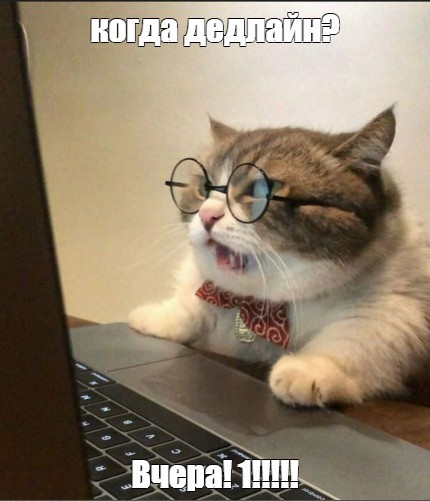

## Задание 4
Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

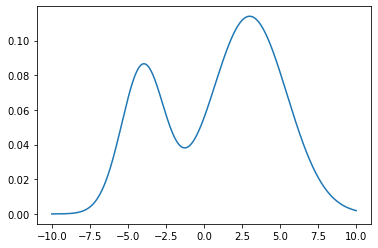

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import norm

x_space = np.linspace(-10, 10, 10000)
y_space = 0.3*norm(-4, np.sqrt(2)).pdf(x_space) + 0.7*norm(3, np.sqrt(6)).pdf(x_space)

plt.plot(x_space, y_space)
plt.show()

In [23]:
a_1 = -4
a_2 = 3

d_1 = 2
d_2 = 6


def Normal(a, d, x):
    return np.exp( - ( x - a )**2/ ( 2 * d ))/( (2*d*pi) ** (1/2) )

def value(x):
    return 0.3*Normal(a_1, d_1, x) + 0.7*Normal(a_2, d_2, x)

def proposal(x):
    x = x + 0.5*np.random.randint(-10, 10, 1)[0]
    return x

In [19]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    
    counter = 0
    current = start
    post = [current]
    for i in range(niter):
        
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        my_rand = np.random.rand()
        if my_rand < p:
            counter += 1
            current = proposed
        post.append(current)
        
    print(counter)
    return post[nburn:]

6814


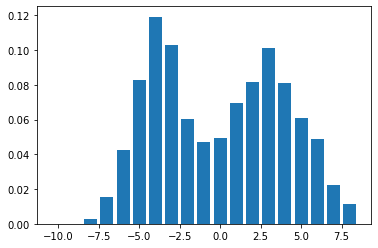

In [24]:
post = metroplis(1, value, proposal, 10000)

plt.hist(post, bins = np.arange(20)-10.5, rwidth = 0.8, density=True)
plt.show()